In [1]:
#https://www.youtube.com/watch?v=SSmpyoIdJTc

import pandas as pd

df = pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_sameRoom_diffPos.csv')
df_02 = pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data.csv')
df_03 = pd.read_csv(r'C:\Users\Superadmin\Desktop\Bachelorarbeit\dataAnalysis\csi_data_diffRoom.csv')
df

,distance,std,rssi,correlation,invalid_01,invalid_02
0,0.0,0.180180,-6,0.403692,0.0,0.0
1,0.0,0.193340,-6,0.259662,0.0,0.0
2,0.0,0.237276,-6,0.186973,0.0,0.0
3,0.0,0.231288,-6,0.277912,0.0,0.0
4,0.0,0.182575,-7,0.249900,0.0,0.0
...,...,...,...,...,...,...
267,2.5,0.007381,-62,0.953764,0.0,0.0
268,2.5,0.007431,-62,0.959580,0.0,0.0
269,2.5,0.003459,-62,0.976903,0.0,0.0
270,2.5,0.007614,-62,0.957354,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

def linReg(x_values, y_values, dgr, df):
    X_train, X_test, y_train, y_test = train_test_split(df[x_values], df[y_values])
    X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

    poly = PolynomialFeatures(degree = dgr)
    X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

    model = linear_model.LinearRegression()
    model = model.fit(X_train_poly, y_train)
    coefficient = model.coef_
    intercept = model.intercept_

    response = intercept + coefficient[1] * x_axis
    for i in range(2,dgr+1):
        response += coefficient[i] * x_axis**i

    prediction = model.predict(X_test_poly)
    print(r2_score(prediction, y_test))

    return response

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_values = "correlation"
y_values = "std"
distance_values = "distance"



colors = ["b", "g", "r", "c", "m", "y", "k"]

x_axis = np.arange(0, 1.1, 0.1)

In [3]:
measured_distances = []

for i in range(len(df)):
    if df["distance"][i] not in measured_distances:
        measured_distances.append(df["distance"][i])

In [4]:
for i in range(len(df)):
    distance.append(float(df[distance_values][i]))
    X.append(float(df[x_values][i]))
    Y.append(float(df[y_values][i]))

for i in range(len(measured_distances)):
    temp = []
    for j in range(len(distance)):
        if i == 0:
            if distance[j] == 0:
                temp.append(j)
        else:
            if distance[j] == float(i/4):
                temp.append(j)

    distribution.append(temp)

NameError: name 'distance' is not defined

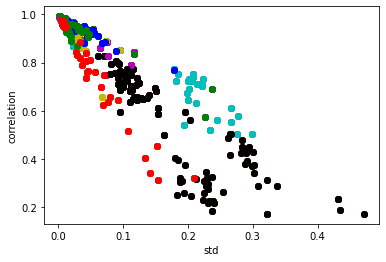

In [ ]:
for i in range(len(distribution)):
    temp_x = []
    temp_y = []
    for j in range(len(distribution[i])):
        temp_x.append(X[distribution[i][j]])
        temp_y.append(Y[distribution[i][j]])
    plt.scatter(temp_x, temp_y, color=colors[i%len(colors)])



#plt.scatter(df[x_values], df[y_values], color='blue')
#plt.scatter(df_02[x_values], df_02[y_values], color='green')
#plt.scatter(df_03[x_values], df_03[y_values], color='red')

#plt.plot(x_axis, response_01, color = 'blue')
#plt.plot(x_axis, response_02, color = 'green')
#plt.plot(x_axis, response_03, color = 'red')

plt.xlabel(x_values)
plt.ylabel(y_values)

plt.show()
#plt.savefig(x_values + "-" + y_values + ".png")
#plt.savefig(x_values + "-" + y_values + "_01.png")